In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
%time
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

sys.path.append('..')
import project

CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 3.34 μs


In [3]:
data_root = '../data/Emory-4DCT'
test_index = 0
mask_roi = 'lung_combined_mask'
mesh_radius = 20
num_levels = 3
conv_channels = 4
conv_kernel_size = 3
num_conv_layers = 2
batch_size = 4
learning_rate = 1e-5

In [4]:
emory4dct = project.imaging.Emory4DCT(data_root)
emory4dct

Emory4DCT('../data/Emory-4DCT', 10 cases)

In [5]:
train_examples = emory4dct.get_examples(mask_roi, mesh_radius)
test_example = train_examples.pop(test_index)
test_example

(PosixPath('../data/Emory-4DCT/Case1Pack/NIFTI/case1_T00.nii.gz'),
 PosixPath('../data/Emory-4DCT/Case1Pack/CorrField/case1_T10_T00.nii.gz'),
 PosixPath('../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T00/lung_combined_mask.nii.gz'),
 PosixPath('../data/Emory-4DCT/Case1Pack/pygalmesh/case1_T00_20.xdmf'),
 20)

In [6]:
train_data = project.data.Dataset(train_examples)
test_data = project.data.Dataset([test_example])

In [7]:
model = project.model.UNet3D(
    in_channels=1,
    out_channels=1,
    num_levels=num_levels,
    num_conv_layers=num_conv_layers,
    conv_channels=conv_channels,
    conv_kernel_size=conv_kernel_size,
).cuda()

In [14]:
%autoreload
trainer = project.training.Trainer(
    model, train_data, test_data, batch_size, learning_rate
)

Running test phase
['case1_T00.nii'].

<IPython.core.display.Javascript object>


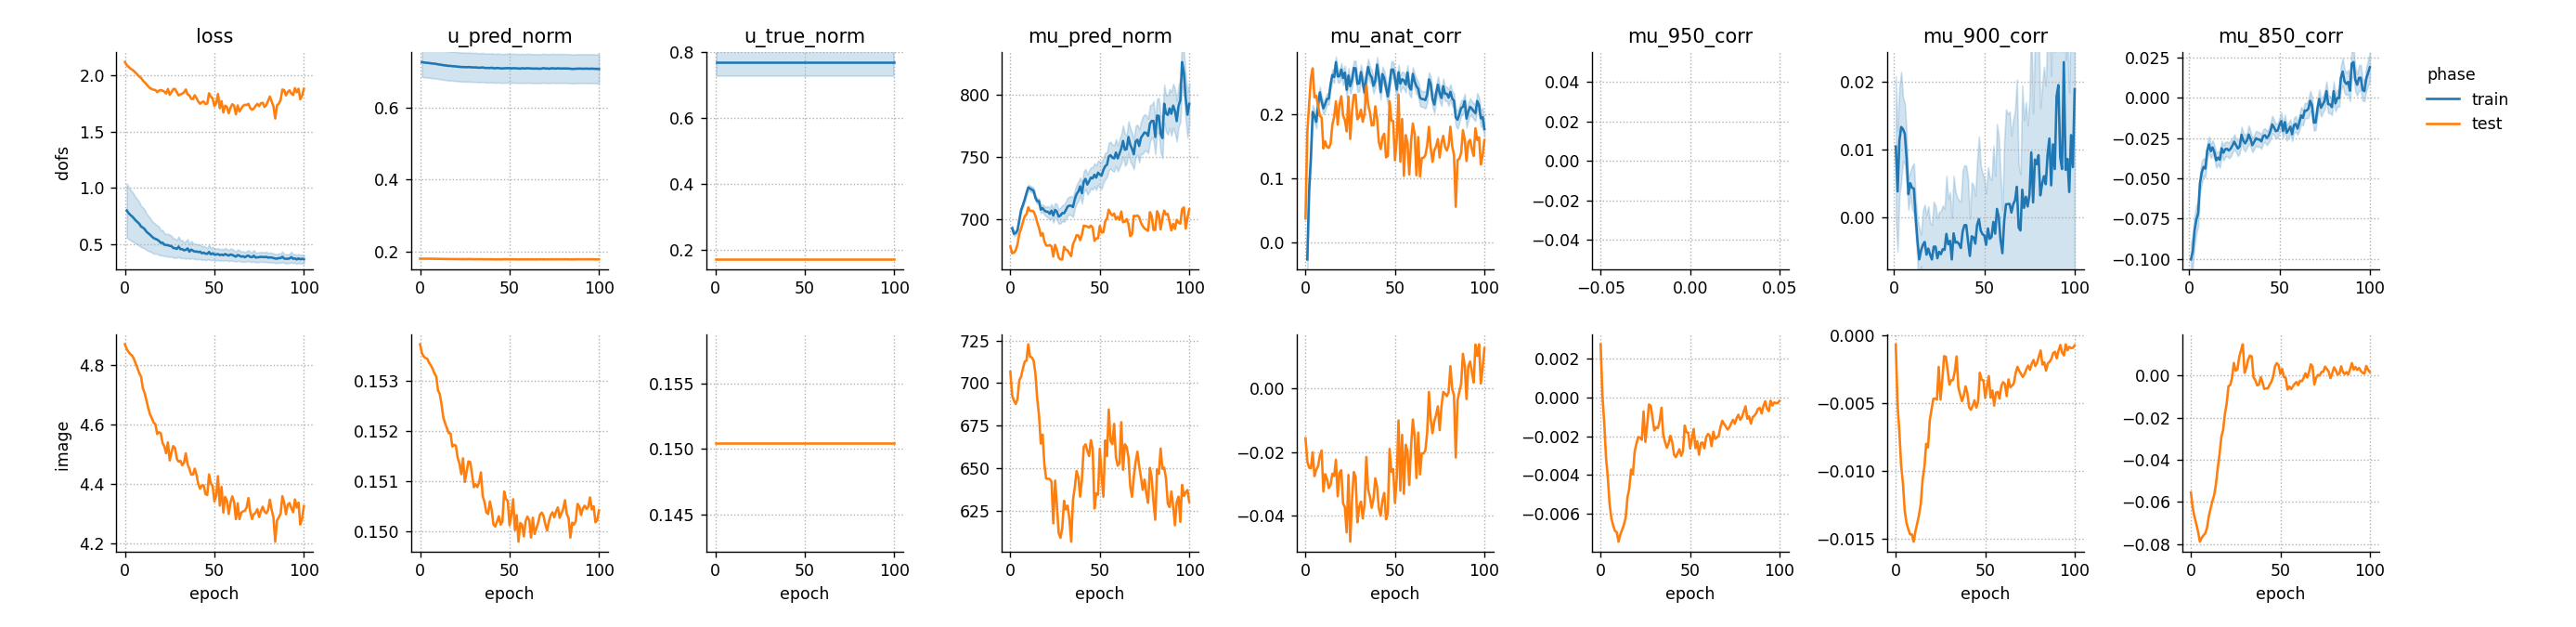

anat


<IPython.core.display.Javascript object>


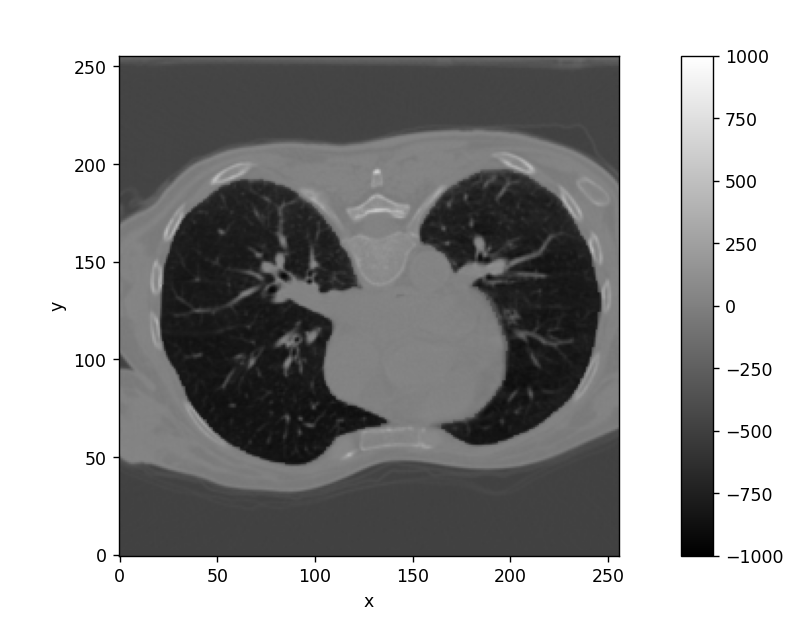

interactive(children=(SelectionSlider(description='c', options=((0, 0),), value=0), SelectionSlider(descriptio…

emph


<IPython.core.display.Javascript object>


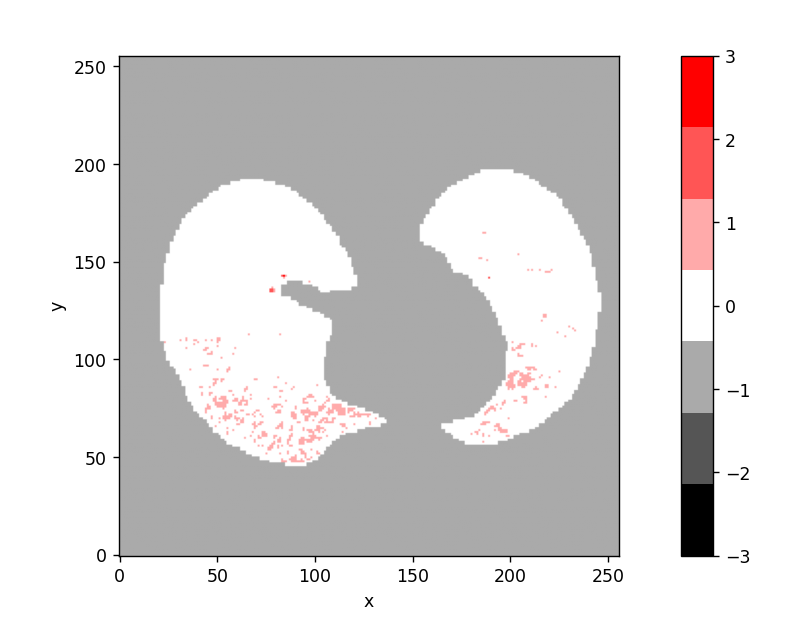

interactive(children=(SelectionSlider(description='c', options=((0, 0),), value=0), SelectionSlider(descriptio…

mu_pred


<IPython.core.display.Javascript object>


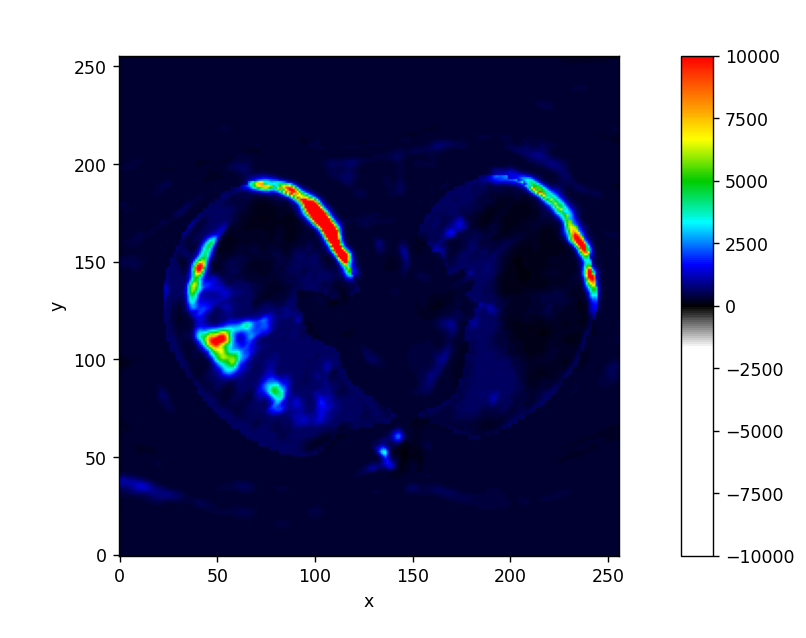

interactive(children=(SelectionSlider(description='c', options=((0, 0),), value=0), SelectionSlider(descriptio…

u_pred


<IPython.core.display.Javascript object>


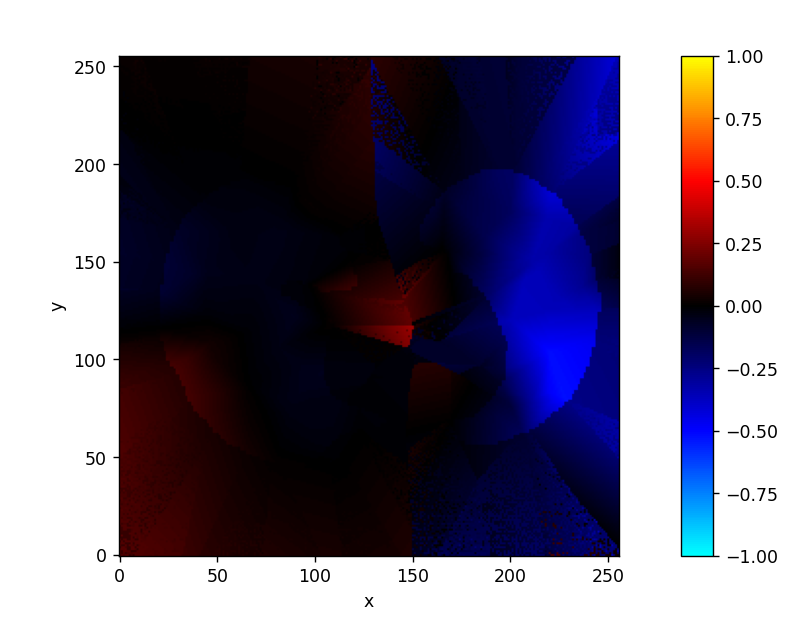

interactive(children=(SelectionSlider(description='c', options=((0, 0), (1, 1), (2, 2)), value=0), SelectionSl…

u_true


<IPython.core.display.Javascript object>


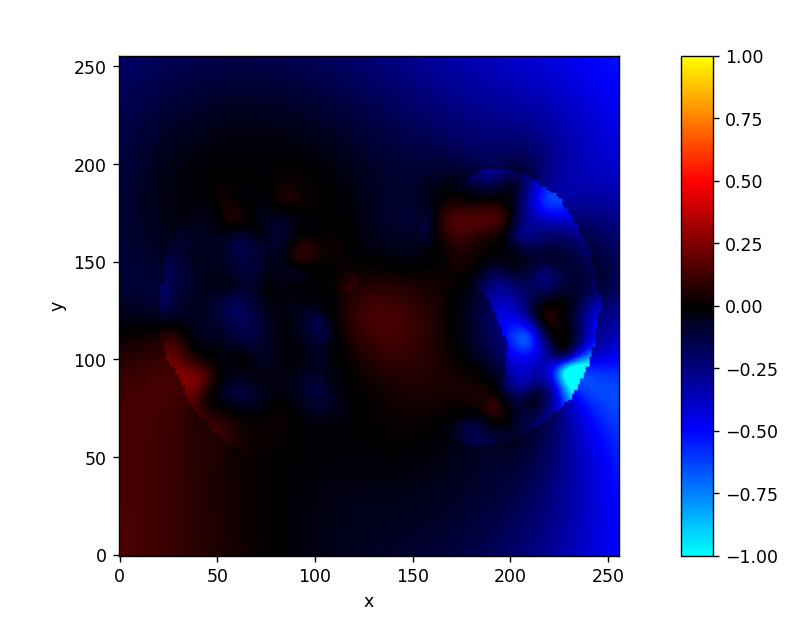

interactive(children=(SelectionSlider(description='c', options=((0, 0), (1, 1), (2, 2)), value=0), SelectionSl…

2.1190


In [15]:
# test forward pass and initialize viewers
trainer.run_epoch(phase='test', epoch=0)

In [16]:
trainer.train(num_epochs=100)

Training...
Epoch 1/100
Running train phase
Loading ../data/Emory-4DCT/Case10Pack/NIFTI/case10_T60.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case10Pack/CorrField/case10_T70_T60.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case10Pack/TotalSegment/case10_T60/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case10Pack/pygalmesh/case10_T60_20.xdmf... 378
Loading ../data/Emory-4DCT/Case8Deploy/NIFTI/case8_T20.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/CorrField/case8_T30_T20.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case8Deploy/TotalSegment/case8_T20/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/pygalmesh/case8_T20_20.xdmf... 679
Loading ../data/Emory-4DCT/Case4Pack/NIFTI/case4_T20.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/CorrField/case4_T30_T20.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T20/lung_combined_mask.nii.gz..

Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T30.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/CorrField/case2_T40_T30.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T30/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/pygalmesh/case2_T30_20.xdmf... 632
['case6_T70.nii', 'case2_T40.nii', 'case2_T70.nii', 'case2_T30.nii']....1.3801
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T20.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case1Pack/CorrField/case1_T30_T20.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T20/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case1Pack/pygalmesh/case1_T20_20.xdmf... 314
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T50.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/CorrField/case2_T60_T50.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T50/lung_com

Loading ../data/Emory-4DCT/Case9Pack/TotalSegment/case9_T10/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case9Pack/pygalmesh/case9_T10_20.xdmf... 275
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T60.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/CorrField/case2_T70_T60.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T60/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/pygalmesh/case2_T60_20.xdmf... 630
Loading ../data/Emory-4DCT/Case10Pack/NIFTI/case10_T80.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case10Pack/CorrField/case10_T90_T80.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case10Pack/TotalSegment/case10_T80/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case10Pack/pygalmesh/case10_T80_20.xdmf... 416
['case9_T30.nii', 'case9_T10.nii', 'case2_T60.nii', 'case10_T80.nii']....0.1876
Loading ../data/Emory-4DCT/Case6Pack/NIFTI/case6_T

['case5_T70.nii', 'case8_T80.nii', 'case1_T60.nii', 'case2_T00.nii']....0.1523
Loading ../data/Emory-4DCT/Case5Pack/NIFTI/case5_T90.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case5Pack/CorrField/case5_T00_T90.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case5Pack/TotalSegment/case5_T90/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case5Pack/pygalmesh/case5_T90_20.xdmf... 443
Loading ../data/Emory-4DCT/Case10Pack/NIFTI/case10_T50.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case10Pack/CorrField/case10_T60_T50.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case10Pack/TotalSegment/case10_T50/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case10Pack/pygalmesh/case10_T50_20.xdmf... 395
Loading ../data/Emory-4DCT/Case10Pack/NIFTI/case10_T30.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case10Pack/CorrField/case10_T40_T30.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case10Pack/TotalSegment/case1

Loading ../data/Emory-4DCT/Case10Pack/CorrField/case10_T50_T40.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case10Pack/TotalSegment/case10_T40/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case10Pack/pygalmesh/case10_T40_20.xdmf... 382
Loading ../data/Emory-4DCT/Case6Pack/NIFTI/case6_T40.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/CorrField/case6_T50_T40.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case6Pack/TotalSegment/case6_T40/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/pygalmesh/case6_T40_20.xdmf... 342
['case1_T70.nii', 'case9_T70.nii', 'case10_T40.nii', 'case6_T40.nii']....0.2758
Loading ../data/Emory-4DCT/Case6Pack/NIFTI/case6_T30.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/CorrField/case6_T40_T30.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case6Pack/TotalSegment/case6_T30/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pac

['case8_T50.nii', 'case9_T50.nii', 'case2_T50.nii', 'case2_T70.nii']....0.6534
['case9_T30.nii', 'case6_T80.nii', 'case5_T70.nii', 'case5_T90.nii']....0.6340
['case2_T00.nii', 'case2_T30.nii', 'case1_T60.nii', 'case1_T10.nii']....1.0712
['case10_T40.nii', 'case7_T90.nii', 'case2_T90.nii', 'case4_T30.nii']....0.3693
['case8_T30.nii', 'case5_T50.nii', 'case7_T30.nii', 'case3_T80.nii']....1.2819
['case4_T50.nii', 'case5_T60.nii', 'case8_T70.nii', 'case9_T10.nii']....0.3180
['case2_T80.nii', 'case1_T30.nii', 'case7_T70.nii', 'case9_T70.nii']....5.5688
['case3_T00.nii', 'case9_T00.nii', 'case10_T60.nii', 'case6_T30.nii']....0.1607
['case7_T40.nii', 'case6_T90.nii', 'case1_T80.nii', 'case9_T60.nii']....0.1019
['case1_T20.nii', 'case5_T20.nii', 'case10_T10.nii', 'case6_T40.nii']....0.5136
['case6_T00.nii', 'case9_T90.nii', 'case9_T40.nii', 'case10_T30.nii']....0.6102
['case8_T40.nii', 'case3_T70.nii', 'case7_T00.nii', 'case10_T20.nii']....0.2105
['case9_T80.nii', 'case5_T00.nii', 'case10_T80.

['case1_T40.nii', 'case1_T90.nii', 'case1_T20.nii', 'case2_T20.nii']....0.9346
['case9_T70.nii', 'case6_T90.nii', 'case4_T30.nii', 'case2_T90.nii']....0.3285
['case3_T20.nii', 'case3_T60.nii', 'case10_T50.nii', 'case6_T50.nii']....0.1292
['case6_T80.nii', 'case7_T80.nii', 'case2_T60.nii', 'case1_T30.nii']....4.6610
['case3_T40.nii', 'case3_T80.nii', 'case5_T70.nii', 'case5_T00.nii']....0.2413
['case7_T00.nii', 'case10_T60.nii', 'case1_T50.nii', 'case5_T80.nii']....0.2881
['case7_T60.nii', 'case3_T30.nii', 'case8_T90.nii', 'case6_T70.nii']....0.2872
['case3_T10.nii', 'case8_T50.nii', 'case5_T30.nii', 'case10_T80.nii']....0.4543
['case10_T40.nii', 'case9_T40.nii', 'case4_T10.nii', 'case8_T80.nii']....0.1537
['case7_T10.nii', 'case5_T10.nii', 'case9_T10.nii', 'case8_T70.nii']....0.1392
['case2_T70.nii', 'case9_T90.nii', 'case8_T00.nii', 'case2_T40.nii']....0.7363
['case3_T00.nii', 'case8_T40.nii', 'case6_T30.nii', 'case7_T30.nii']....0.2245
['case2_T10.nii', 'case10_T20.nii', 'case9_T50.n

['case7_T20.nii', 'case5_T30.nii', 'case9_T90.nii', 'case6_T10.nii']....1.4245
['case5_T10.nii', 'case7_T60.nii', 'case4_T50.nii', 'case5_T50.nii']....0.3404
['case3_T60.nii', 'case7_T30.nii', 'case6_T00.nii', 'case8_T00.nii']....0.6336
['case3_T70.nii', 'case10_T60.nii', 'case2_T00.nii', 'case10_T20.nii']....0.1495
['case4_T10.nii', 'case10_T50.nii', 'case6_T30.nii', 'case1_T60.nii']....0.1318
['case7_T10.nii', 'case6_T90.nii', 'case3_T80.nii', 'case8_T70.nii']....0.1253
['case9_T80.nii', 'case9_T40.nii', 'case3_T00.nii', 'case1_T30.nii']....3.9507
['case6_T20.nii', 'case2_T70.nii', 'case10_T70.nii', 'case1_T50.nii']....0.3835
['case10_T00.nii', 'case1_T90.nii', 'case4_T30.nii', 'case7_T50.nii']....0.7402
['case6_T80.nii', 'case3_T90.nii', 'case7_T90.nii', 'case2_T90.nii']....0.3569
['case10_T40.nii', 'case3_T10.nii', 'case7_T70.nii', 'case5_T60.nii']....0.0982
['case9_T30.nii', 'case9_T70.nii', 'case3_T40.nii', 'case7_T80.nii']....0.2730
['case4_T60.nii', 'case2_T40.nii', 'case8_T90.

['case5_T70.nii', 'case2_T80.nii', 'case1_T80.nii', 'case7_T60.nii']....0.3827
['case5_T00.nii', 'case7_T40.nii', 'case2_T70.nii', 'case9_T90.nii']....0.3274
['case8_T10.nii', 'case3_T30.nii', 'case8_T30.nii', 'case3_T90.nii']....1.0292
['case4_T30.nii', 'case7_T70.nii', 'case4_T50.nii', 'case6_T60.nii']....0.3686
['case5_T80.nii', 'case1_T30.nii', 'case4_T60.nii', 'case9_T00.nii']....3.7003
['case3_T80.nii', 'case4_T90.nii', 'case7_T50.nii', 'case8_T50.nii']....0.3681
['case1_T20.nii', 'case7_T20.nii', 'case1_T60.nii', 'case5_T10.nii']....0.7773
['case3_T50.nii', 'case4_T40.nii', 'case8_T60.nii', 'case10_T00.nii']....0.3442
['case6_T40.nii', 'case3_T00.nii', 'case2_T40.nii', 'case10_T10.nii']....0.6863
['case3_T20.nii', 'case3_T40.nii', 'case10_T30.nii', 'case10_T40.nii']....0.1814
['case2_T60.nii', 'case6_T10.nii', 'case7_T00.nii', 'case1_T50.nii']....0.3214
['case4_T10.nii', 'case10_T90.nii', 'case7_T90.nii', 'case6_T30.nii']....0.2134
['case4_T20.nii', 'case9_T70.nii', 'case1_T40.n

['case1_T60.nii', 'case10_T50.nii', 'case1_T50.nii', 'case5_T10.nii']....0.1806
['case4_T10.nii', 'case10_T40.nii', 'case4_T50.nii', 'case2_T20.nii']....0.6070
['case1_T80.nii', 'case7_T40.nii', 'case9_T00.nii', 'case6_T90.nii']....0.1198
['case2_T80.nii', 'case6_T70.nii', 'case3_T50.nii', 'case5_T70.nii']....0.5110
['case1_T40.nii', 'case10_T80.nii', 'case10_T20.nii', 'case4_T70.nii']....0.1430
['case1_T70.nii', 'case1_T10.nii', 'case7_T60.nii', 'case3_T00.nii']....0.3589
['case5_T40.nii', 'case8_T40.nii', 'case4_T80.nii', 'case4_T60.nii']....0.6473
['case8_T10.nii', 'case2_T70.nii', 'case8_T20.nii', 'case7_T10.nii']....0.2809
['case10_T90.nii', 'case3_T90.nii', 'case6_T00.nii', 'case5_T80.nii']....0.5705
['case9_T80.nii', 'case8_T60.nii', 'case4_T20.nii', 'case7_T80.nii']....0.2959
['case1_T20.nii', 'case9_T10.nii', 'case9_T90.nii', 'case2_T60.nii']....0.2052
['case7_T20.nii', 'case9_T20.nii', 'case4_T00.nii', 'case8_T30.nii']....1.1870
['case8_T50.nii', 'case3_T80.nii', 'case6_T60.n

['case3_T50.nii', 'case2_T90.nii', 'case4_T10.nii', 'case9_T70.nii']....0.3364
['case10_T40.nii', 'case6_T10.nii', 'case9_T00.nii', 'case1_T40.nii']....0.2131
['case7_T60.nii', 'case7_T90.nii', 'case8_T40.nii', 'case4_T40.nii']....0.2381
['case7_T40.nii', 'case9_T80.nii', 'case10_T80.nii', 'case9_T50.nii']....0.1226
['case10_T50.nii', 'case3_T00.nii', 'case5_T90.nii', 'case10_T30.nii']....0.3131
['case6_T50.nii', 'case6_T40.nii', 'case4_T70.nii', 'case8_T60.nii']....0.2242
['case3_T60.nii', 'case6_T30.nii', 'case4_T30.nii', 'case6_T80.nii']....0.1917
['case9_T20.nii', 'case8_T50.nii', 'case2_T50.nii', 'case2_T20.nii']....0.7488
['case3_T70.nii', 'case5_T60.nii', 'case6_T20.nii', 'case7_T30.nii']....0.2893
['case6_T60.nii', 'case2_T30.nii', 'case2_T80.nii', 'case2_T40.nii']....1.2222
['case8_T10.nii', 'case3_T80.nii', 'case6_T00.nii', 'case7_T10.nii']....0.3742
['case7_T00.nii', 'case10_T60.nii', 'case5_T80.nii', 'case1_T80.nii']....0.2320
['case6_T70.nii', 'case4_T00.nii', 'case5_T20.n

['case5_T60.nii', 'case4_T20.nii', 'case7_T40.nii', 'case8_T20.nii']....0.1894
['case3_T70.nii', 'case6_T80.nii', 'case3_T50.nii', 'case8_T50.nii']....0.2229
['case6_T00.nii', 'case2_T50.nii', 'case2_T30.nii', 'case1_T60.nii']....1.3417
['case4_T50.nii', 'case5_T90.nii', 'case1_T90.nii', 'case9_T70.nii']....0.7850
['case7_T70.nii', 'case8_T40.nii', 'case2_T60.nii', 'case6_T20.nii']....0.2764
['case7_T00.nii', 'case9_T60.nii', 'case7_T60.nii', 'case2_T80.nii']....0.3694
['case5_T80.nii', 'case1_T20.nii', 'case3_T20.nii', 'case10_T60.nii']....0.2089
['case7_T20.nii', 'case5_T50.nii', 'case7_T50.nii', 'case1_T50.nii']....0.4768
['case4_T60.nii', 'case4_T10.nii', 'case6_T60.nii', 'case5_T10.nii']....0.4782
['case10_T10.nii', 'case3_T80.nii', 'case10_T70.nii', 'case2_T40.nii']....0.5917
['case9_T10.nii', 'case10_T30.nii', 'case9_T80.nii', 'case1_T40.nii']....0.1569
['case6_T50.nii', 'case7_T80.nii', 'case8_T90.nii', 'case7_T10.nii']....0.2357
['case3_T40.nii', 'case4_T90.nii', 'case2_T10.ni

['case5_T80.nii', 'case4_T00.nii', 'case3_T10.nii', 'case6_T30.nii']....0.1520
['case5_T20.nii', 'case1_T50.nii', 'case4_T50.nii', 'case4_T40.nii']....0.4161
['case7_T20.nii', 'case6_T80.nii', 'case10_T70.nii', 'case9_T30.nii']....0.2797
['case8_T40.nii', 'case3_T50.nii', 'case8_T00.nii', 'case8_T20.nii']....0.3760
['case4_T70.nii', 'case9_T40.nii', 'case1_T80.nii', 'case6_T90.nii']....0.1579
['case6_T70.nii', 'case2_T40.nii', 'case1_T90.nii', 'case9_T20.nii']....0.7290
['case8_T70.nii', 'case5_T90.nii', 'case10_T10.nii', 'case2_T60.nii']....0.5441
['case1_T30.nii', 'case5_T50.nii', 'case2_T30.nii', 'case2_T10.nii']....2.3817
['case6_T60.nii', 'case9_T00.nii', 'case3_T40.nii', 'case4_T80.nii']....0.1913
['case5_T30.nii', 'case7_T60.nii', 'case4_T90.nii', 'case9_T70.nii']....0.4196
['case2_T80.nii', 'case10_T80.nii', 'case5_T00.nii', 'case3_T30.nii']....0.3953
['case9_T60.nii', 'case6_T10.nii', 'case10_T20.nii', 'case8_T50.nii']....0.2097
['case7_T90.nii', 'case7_T70.nii', 'case5_T40.ni

['case3_T60.nii', 'case9_T40.nii', 'case4_T90.nii', 'case4_T50.nii']....0.3362
['case8_T20.nii', 'case2_T90.nii', 'case4_T20.nii', 'case2_T10.nii']....0.3235
['case7_T10.nii', 'case1_T10.nii', 'case8_T30.nii', 'case4_T60.nii']....1.2281
['case9_T10.nii', 'case6_T20.nii', 'case8_T80.nii', 'case5_T60.nii']....0.1757
['case10_T70.nii', 'case7_T40.nii', 'case2_T40.nii', 'case3_T20.nii']....0.4164
['case4_T80.nii', 'case5_T30.nii', 'case3_T90.nii', 'case3_T10.nii']....0.5177
['case7_T90.nii', 'case5_T00.nii', 'case4_T70.nii', 'case2_T20.nii']....0.3872
['case1_T60.nii', 'case2_T30.nii', 'case2_T70.nii', 'case3_T50.nii']....0.8917
['case1_T70.nii', 'case8_T00.nii', 'case10_T90.nii', 'case6_T10.nii']....0.3638
['case3_T70.nii', 'case1_T20.nii', 'case9_T50.nii', 'case10_T40.nii']....0.1383
['case7_T50.nii', 'case6_T00.nii', 'case9_T60.nii', 'case7_T80.nii']....0.5421
['case6_T70.nii', 'case3_T80.nii', 'case4_T00.nii', 'case3_T30.nii']....0.1620
['case5_T10.nii', 'case7_T60.nii', 'case1_T30.nii

['case10_T90.nii', 'case4_T60.nii', 'case5_T30.nii', 'case8_T80.nii']....0.7982
['case10_T00.nii', 'case2_T20.nii', 'case7_T00.nii', 'case10_T50.nii']....0.2978
['case7_T80.nii', 'case8_T30.nii', 'case6_T30.nii', 'case6_T50.nii']....0.7087
['case9_T80.nii', 'case3_T60.nii', 'case4_T80.nii', 'case7_T70.nii']....0.1335
['case10_T40.nii', 'case9_T20.nii', 'case6_T80.nii', 'case1_T40.nii']....0.1393
['case1_T30.nii', 'case2_T80.nii', 'case9_T60.nii', 'case8_T20.nii']....1.7057
['case4_T20.nii', 'case8_T10.nii', 'case5_T20.nii', 'case7_T20.nii']....0.3262
['case5_T10.nii', 'case6_T40.nii', 'case5_T60.nii', 'case3_T30.nii']....0.1657
['case7_T60.nii', 'case2_T40.nii', 'case4_T10.nii', 'case9_T30.nii']....0.4812
['case9_T40.nii', 'case3_T80.nii', 'case4_T00.nii', 'case5_T50.nii']....0.1545
['case9_T10.nii', 'case6_T00.nii', 'case1_T80.nii', 'case1_T50.nii']....0.3801
['case1_T10.nii', 'case5_T80.nii', 'case10_T20.nii', 'case8_T40.nii']....0.3427
['case2_T90.nii', 'case3_T00.nii', 'case7_T30.n

['case2_T70.nii', 'case9_T80.nii', 'case7_T40.nii', 'case4_T10.nii']....0.2946
['case8_T70.nii', 'case6_T70.nii', 'case10_T40.nii', 'case1_T60.nii']....0.1849
['case3_T70.nii', 'case3_T00.nii', 'case1_T70.nii', 'case10_T70.nii']....0.1796
['case8_T80.nii', 'case5_T40.nii', 'case2_T50.nii', 'case9_T50.nii']....0.6857
['case2_T60.nii', 'case3_T80.nii', 'case9_T90.nii', 'case6_T20.nii']....0.2863
['case10_T00.nii', 'case9_T10.nii', 'case6_T30.nii', 'case2_T00.nii']....0.0998
['case3_T10.nii', 'case10_T90.nii', 'case8_T00.nii', 'case7_T80.nii']....0.2821
['case4_T30.nii', 'case8_T90.nii', 'case9_T00.nii', 'case4_T80.nii']....0.2332
['case3_T40.nii', 'case6_T50.nii', 'case1_T50.nii', 'case2_T80.nii']....0.4574
['case8_T30.nii', 'case7_T70.nii', 'case3_T90.nii', 'case10_T80.nii']....0.7623
['case2_T40.nii', 'case6_T80.nii', 'case9_T40.nii', 'case5_T80.nii']....0.4863
['case5_T00.nii', 'case5_T20.nii', 'case1_T90.nii', 'case4_T20.nii']....0.5170
['case6_T00.nii', 'case9_T20.nii', 'case7_T60.n

['case3_T30.nii', 'case8_T20.nii', 'case4_T70.nii', 'case10_T40.nii']....0.1652
['case5_T80.nii', 'case4_T40.nii', 'case6_T50.nii', 'case7_T90.nii']....0.2370
['case4_T60.nii', 'case4_T30.nii', 'case1_T20.nii', 'case9_T90.nii']....0.5942
['case7_T10.nii', 'case3_T90.nii', 'case6_T80.nii', 'case2_T90.nii']....0.3336
['case10_T50.nii', 'case7_T60.nii', 'case1_T60.nii', 'case9_T10.nii']....0.1199
['case7_T00.nii', 'case2_T30.nii', 'case1_T10.nii', 'case7_T50.nii']....1.0234
['case3_T10.nii', 'case5_T10.nii', 'case9_T70.nii', 'case7_T40.nii']....0.1483
['case8_T50.nii', 'case2_T10.nii', 'case9_T30.nii', 'case8_T70.nii']....0.2165
['case10_T00.nii', 'case5_T60.nii', 'case7_T20.nii', 'case6_T40.nii']....0.2252
['case7_T80.nii', 'case8_T40.nii', 'case5_T90.nii', 'case9_T80.nii']....0.3256
['case1_T50.nii', 'case2_T00.nii', 'case2_T50.nii', 'case4_T00.nii']....0.5318
['case5_T20.nii', 'case3_T80.nii', 'case1_T80.nii', 'case4_T50.nii']....0.3262
['case8_T80.nii', 'case10_T90.nii', 'case2_T40.ni

['case7_T20.nii', 'case4_T40.nii', 'case10_T70.nii', 'case7_T40.nii']....0.2588
['case3_T90.nii', 'case4_T50.nii', 'case4_T10.nii', 'case6_T30.nii']....0.3828
['case1_T50.nii', 'case6_T80.nii', 'case8_T70.nii', 'case9_T80.nii']....0.1771
['case5_T50.nii', 'case3_T50.nii', 'case3_T80.nii', 'case1_T70.nii']....0.2567
['case10_T00.nii', 'case3_T40.nii', 'case3_T10.nii', 'case1_T60.nii']....0.2234
['case2_T90.nii', 'case8_T10.nii', 'case10_T60.nii', 'case8_T20.nii']....0.2661
['case7_T60.nii', 'case8_T80.nii', 'case10_T80.nii', 'case3_T00.nii']....0.1264
['case8_T40.nii', 'case7_T00.nii', 'case6_T00.nii', 'case8_T60.nii']....0.5056
['case6_T10.nii', 'case10_T10.nii', 'case3_T20.nii', 'case2_T20.nii']....0.5200
['case2_T40.nii', 'case8_T90.nii', 'case6_T90.nii', 'case9_T30.nii']....0.5276
['case3_T70.nii', 'case9_T70.nii', 'case5_T80.nii', 'case1_T30.nii']....1.0371
['case9_T10.nii', 'case6_T50.nii', 'case5_T00.nii', 'case4_T20.nii']....0.1871
['case3_T30.nii', 'case10_T90.nii', 'case6_T20.

['case7_T50.nii', 'case8_T10.nii', 'case10_T80.nii', 'case2_T10.nii']....0.3250
['case5_T80.nii', 'case3_T30.nii', 'case8_T40.nii', 'case9_T70.nii']....0.2179
['case5_T00.nii', 'case6_T30.nii', 'case4_T40.nii', 'case6_T10.nii']....0.2627
['case9_T90.nii', 'case1_T10.nii', 'case10_T60.nii', 'case4_T30.nii']....0.3802
['case10_T10.nii', 'case1_T60.nii', 'case7_T30.nii', 'case5_T30.nii']....0.6566
['case7_T20.nii', 'case7_T10.nii', 'case7_T80.nii', 'case9_T40.nii']....0.3546
['case8_T00.nii', 'case10_T20.nii', 'case2_T50.nii', 'case3_T60.nii']....0.6487
['case3_T20.nii', 'case7_T40.nii', 'case4_T80.nii', 'case9_T60.nii']....0.1014
['case9_T10.nii', 'case3_T50.nii', 'case8_T50.nii', 'case8_T30.nii']....0.7238
['case4_T20.nii', 'case1_T70.nii', 'case5_T40.nii', 'case5_T70.nii']....0.4058
['case7_T00.nii', 'case1_T50.nii', 'case7_T90.nii', 'case2_T20.nii']....0.3839
['case5_T10.nii', 'case3_T10.nii', 'case1_T30.nii', 'case2_T70.nii']....1.1946
['case8_T90.nii', 'case10_T30.nii', 'case7_T70.n

['case5_T00.nii', 'case7_T10.nii', 'case4_T30.nii', 'case2_T70.nii']....0.3780
['case10_T20.nii', 'case7_T60.nii', 'case1_T50.nii', 'case7_T20.nii']....0.2666
['case8_T00.nii', 'case7_T70.nii', 'case1_T40.nii', 'case9_T70.nii']....0.2565
['case9_T60.nii', 'case4_T60.nii', 'case4_T80.nii', 'case8_T60.nii']....0.5207
['case9_T20.nii', 'case2_T80.nii', 'case5_T70.nii', 'case4_T20.nii']....0.3541
['case6_T60.nii', 'case5_T40.nii', 'case1_T90.nii', 'case10_T10.nii']....0.7802
['case2_T90.nii', 'case3_T60.nii', 'case7_T50.nii', 'case9_T90.nii']....0.4738
['case8_T90.nii', 'case1_T10.nii', 'case5_T10.nii', 'case6_T80.nii']....0.3047
['case6_T40.nii', 'case4_T90.nii', 'case3_T40.nii', 'case2_T60.nii']....0.2560
['case2_T50.nii', 'case3_T00.nii', 'case4_T10.nii', 'case9_T10.nii']....0.4964
['case8_T50.nii', 'case8_T30.nii', 'case6_T10.nii', 'case2_T00.nii']....0.7390
['case4_T00.nii', 'case9_T30.nii', 'case10_T70.nii', 'case3_T90.nii']....0.2577
['case3_T80.nii', 'case4_T70.nii', 'case9_T40.nii

['case9_T90.nii', 'case1_T90.nii', 'case3_T20.nii', 'case10_T80.nii']....0.4195
['case4_T20.nii', 'case9_T10.nii', 'case8_T00.nii', 'case7_T50.nii']....0.4306
['case1_T10.nii', 'case6_T40.nii', 'case10_T50.nii', 'case10_T00.nii']....0.2801
['case7_T40.nii', 'case8_T90.nii', 'case3_T70.nii', 'case1_T80.nii']....0.1988
['case5_T20.nii', 'case7_T90.nii', 'case10_T40.nii', 'case6_T30.nii']....0.1991
['case9_T70.nii', 'case5_T60.nii', 'case3_T80.nii', 'case8_T60.nii']....0.1962
['case2_T70.nii', 'case1_T40.nii', 'case6_T00.nii', 'case4_T60.nii']....0.8522
['case6_T80.nii', 'case6_T10.nii', 'case5_T10.nii', 'case1_T60.nii']....0.2365
['case8_T70.nii', 'case3_T30.nii', 'case4_T80.nii', 'case7_T80.nii']....0.1544
['case3_T00.nii', 'case2_T10.nii', 'case6_T60.nii', 'case3_T60.nii']....0.2076
['case2_T20.nii', 'case10_T10.nii', 'case9_T40.nii', 'case4_T30.nii']....0.5526
['case9_T00.nii', 'case4_T50.nii', 'case3_T10.nii', 'case1_T20.nii']....0.3153
['case4_T90.nii', 'case9_T50.nii', 'case9_T60.n

['case9_T10.nii', 'case8_T20.nii', 'case4_T80.nii', 'case7_T90.nii']....0.1929
['case4_T70.nii', 'case6_T70.nii', 'case6_T40.nii', 'case9_T50.nii']....0.1665
['case2_T60.nii', 'case2_T80.nii', 'case10_T00.nii', 'case1_T20.nii']....0.3809
['case4_T10.nii', 'case5_T90.nii', 'case5_T20.nii', 'case1_T90.nii']....0.5640
['case9_T80.nii', 'case9_T40.nii', 'case5_T50.nii', 'case9_T60.nii']....0.1894
['case6_T50.nii', 'case5_T70.nii', 'case7_T40.nii', 'case7_T60.nii']....0.1540
['case10_T70.nii', 'case3_T20.nii', 'case10_T10.nii', 'case3_T60.nii']....0.3137
['case5_T30.nii', 'case6_T00.nii', 'case3_T70.nii', 'case1_T70.nii']....0.6437
['case4_T30.nii', 'case3_T50.nii', 'case2_T70.nii', 'case7_T30.nii']....0.5000
['case2_T90.nii', 'case2_T00.nii', 'case9_T90.nii', 'case1_T40.nii']....0.2916
['case2_T50.nii', 'case4_T90.nii', 'case1_T10.nii', 'case8_T60.nii']....0.7309
['case4_T60.nii', 'case1_T80.nii', 'case5_T10.nii', 'case10_T80.nii']....0.4689
['case5_T60.nii', 'case9_T70.nii', 'case3_T90.ni

['case4_T90.nii', 'case3_T30.nii', 'case5_T80.nii', 'case6_T30.nii']....0.1760
['case4_T00.nii', 'case6_T80.nii', 'case4_T30.nii', 'case1_T30.nii']....0.9737
['case3_T90.nii', 'case3_T00.nii', 'case3_T20.nii', 'case5_T40.nii']....0.4209
['case8_T50.nii', 'case6_T10.nii', 'case3_T10.nii', 'case7_T20.nii']....0.3076
['case3_T40.nii', 'case5_T20.nii', 'case8_T90.nii', 'case7_T50.nii']....0.4813
['case6_T20.nii', 'case10_T70.nii', 'case5_T90.nii', 'case2_T50.nii']....0.7229
['case3_T70.nii', 'case8_T00.nii', 'case10_T00.nii', 'case7_T70.nii']....0.2134
['case9_T30.nii', 'case1_T50.nii', 'case2_T10.nii', 'case4_T60.nii']....0.6114
['case2_T40.nii', 'case10_T30.nii', 'case4_T10.nii', 'case2_T00.nii']....0.4155
['case2_T20.nii', 'case8_T60.nii', 'case1_T60.nii', 'case10_T40.nii']....0.3339
['case8_T30.nii', 'case4_T50.nii', 'case5_T70.nii', 'case10_T10.nii']....0.8997
['case4_T20.nii', 'case8_T80.nii', 'case5_T50.nii', 'case2_T70.nii']....0.3106
['case8_T20.nii', 'case6_T00.nii', 'case1_T10.n

['case3_T60.nii', 'case10_T20.nii', 'case1_T10.nii', 'case4_T90.nii']....0.3217
['case4_T20.nii', 'case5_T40.nii', 'case6_T30.nii', 'case4_T30.nii']....0.4094
['case10_T40.nii', 'case9_T90.nii', 'case8_T10.nii', 'case5_T60.nii']....0.1406
['case8_T90.nii', 'case2_T50.nii', 'case9_T50.nii', 'case3_T30.nii']....0.5815
['case1_T20.nii', 'case10_T90.nii', 'case2_T40.nii', 'case1_T70.nii']....0.5087
['case9_T40.nii', 'case2_T00.nii', 'case6_T80.nii', 'case5_T80.nii']....0.2020
['case9_T60.nii', 'case7_T70.nii', 'case7_T90.nii', 'case2_T30.nii']....0.6681
['case3_T90.nii', 'case3_T10.nii', 'case4_T10.nii', 'case6_T70.nii']....0.2845
['case7_T60.nii', 'case6_T60.nii', 'case9_T00.nii', 'case5_T10.nii']....0.1461
['case3_T70.nii', 'case4_T50.nii', 'case5_T00.nii', 'case9_T30.nii']....0.3569
['case2_T90.nii', 'case6_T40.nii', 'case6_T00.nii', 'case9_T80.nii']....0.4626
['case1_T90.nii', 'case2_T10.nii', 'case5_T90.nii', 'case3_T40.nii']....0.6176
['case10_T80.nii', 'case6_T90.nii', 'case8_T50.ni

['case3_T20.nii', 'case6_T20.nii', 'case4_T00.nii', 'case1_T60.nii']....0.2454
['case1_T90.nii', 'case5_T60.nii', 'case2_T10.nii', 'case5_T30.nii']....0.6720
['case9_T50.nii', 'case8_T00.nii', 'case2_T40.nii', 'case4_T50.nii']....0.6150
['case2_T60.nii', 'case7_T90.nii', 'case5_T90.nii', 'case7_T40.nii']....0.3140
['case6_T40.nii', 'case4_T70.nii', 'case10_T00.nii', 'case2_T30.nii']....0.6152
['case7_T00.nii', 'case4_T90.nii', 'case6_T60.nii', 'case5_T50.nii']....0.2112
['case9_T00.nii', 'case2_T70.nii', 'case4_T80.nii', 'case7_T10.nii']....0.2738
['case5_T70.nii', 'case9_T10.nii', 'case6_T30.nii', 'case3_T50.nii']....0.2042
['case10_T40.nii', 'case7_T20.nii', 'case4_T60.nii', 'case4_T10.nii']....0.6036
['case6_T10.nii', 'case8_T80.nii', 'case9_T70.nii', 'case6_T50.nii']....0.2394
['case1_T50.nii', 'case8_T90.nii', 'case4_T40.nii', 'case7_T30.nii']....0.3213
['case3_T30.nii', 'case2_T00.nii', 'case5_T40.nii', 'case5_T80.nii']....0.3681
['case10_T60.nii', 'case10_T80.nii', 'case9_T60.ni

['case2_T70.nii', 'case10_T50.nii', 'case2_T60.nii', 'case7_T80.nii']....0.2947
['case5_T40.nii', 'case9_T90.nii', 'case5_T90.nii', 'case2_T30.nii']....0.8990
['case9_T80.nii', 'case4_T90.nii', 'case2_T90.nii', 'case9_T40.nii']....0.2799
['case7_T60.nii', 'case6_T30.nii', 'case9_T00.nii', 'case9_T70.nii']....0.1405
['case1_T60.nii', 'case5_T00.nii', 'case9_T30.nii', 'case6_T60.nii']....0.2730
['case3_T60.nii', 'case6_T70.nii', 'case5_T50.nii', 'case2_T00.nii']....0.1987
['case10_T80.nii', 'case8_T50.nii', 'case7_T70.nii', 'case7_T10.nii']....0.1447
['case8_T70.nii', 'case10_T60.nii', 'case4_T10.nii', 'case5_T30.nii']....0.4362
['case3_T10.nii', 'case5_T60.nii', 'case1_T80.nii', 'case9_T60.nii']....0.1165
['case5_T70.nii', 'case8_T30.nii', 'case10_T90.nii', 'case1_T70.nii']....0.5562
['case4_T20.nii', 'case7_T30.nii', 'case3_T90.nii', 'case8_T80.nii']....0.3228
['case4_T30.nii', 'case6_T00.nii', 'case8_T10.nii', 'case4_T40.nii']....0.3920
['case10_T30.nii', 'case4_T80.nii', 'case7_T90.n

['case2_T80.nii', 'case10_T00.nii', 'case2_T10.nii', 'case1_T50.nii']....0.3456
['case3_T10.nii', 'case7_T00.nii', 'case2_T90.nii', 'case5_T70.nii']....0.2960
['case7_T10.nii', 'case8_T80.nii', 'case2_T20.nii', 'case9_T20.nii']....0.2157
['case4_T20.nii', 'case6_T50.nii', 'case10_T70.nii', 'case1_T10.nii']....0.3485
['case4_T40.nii', 'case1_T30.nii', 'case4_T90.nii', 'case2_T40.nii']....1.1667
['case9_T70.nii', 'case9_T50.nii', 'case5_T80.nii', 'case7_T60.nii']....0.1598
['case10_T20.nii', 'case4_T50.nii', 'case9_T90.nii', 'case2_T00.nii']....0.3029
['case8_T40.nii', 'case1_T70.nii', 'case8_T30.nii', 'case5_T00.nii']....0.5716
['case10_T50.nii', 'case3_T90.nii', 'case1_T80.nii', 'case8_T20.nii']....0.2775
['case9_T30.nii', 'case6_T20.nii', 'case1_T60.nii', 'case6_T00.nii']....0.5019
['case10_T90.nii', 'case3_T50.nii', 'case2_T60.nii', 'case8_T60.nii']....0.3883
['case1_T20.nii', 'case9_T60.nii', 'case9_T80.nii', 'case5_T40.nii']....0.3281
['case10_T80.nii', 'case9_T10.nii', 'case6_T80.

['case1_T90.nii', 'case9_T80.nii', 'case4_T00.nii', 'case1_T20.nii']....0.3977
['case10_T80.nii', 'case7_T90.nii', 'case1_T50.nii', 'case9_T50.nii']....0.1922
['case9_T10.nii', 'case7_T80.nii', 'case7_T30.nii', 'case6_T20.nii']....0.2845
['case6_T10.nii', 'case8_T00.nii', 'case8_T40.nii', 'case8_T70.nii']....0.3364
['case8_T10.nii', 'case2_T40.nii', 'case7_T70.nii', 'case10_T50.nii']....0.3982
['case1_T80.nii', 'case5_T70.nii', 'case4_T60.nii', 'case1_T30.nii']....0.9931
['case2_T20.nii', 'case6_T00.nii', 'case9_T40.nii', 'case8_T20.nii']....0.5375
['case3_T90.nii', 'case5_T90.nii', 'case1_T60.nii', 'case3_T80.nii']....0.3595
['case10_T70.nii', 'case6_T40.nii', 'case4_T70.nii', 'case6_T90.nii']....0.1322
['case5_T80.nii', 'case4_T90.nii', 'case9_T00.nii', 'case3_T60.nii']....0.1646
['case2_T60.nii', 'case3_T00.nii', 'case2_T30.nii', 'case4_T20.nii']....0.7079
['case1_T70.nii', 'case6_T70.nii', 'case10_T90.nii', 'case6_T50.nii']....0.2243
['case2_T10.nii', 'case7_T10.nii', 'case5_T20.ni

['case8_T70.nii', 'case4_T70.nii', 'case7_T00.nii', 'case10_T50.nii']....0.1598
['case1_T40.nii', 'case7_T60.nii', 'case2_T10.nii', 'case9_T10.nii']....0.1678
['case3_T70.nii', 'case2_T00.nii', 'case4_T20.nii', 'case9_T50.nii']....0.1646
['case10_T00.nii', 'case2_T80.nii', 'case3_T60.nii', 'case3_T90.nii']....0.3721
['case5_T40.nii', 'case8_T00.nii', 'case6_T30.nii', 'case9_T00.nii']....0.3997
['case10_T60.nii', 'case4_T00.nii', 'case5_T80.nii', 'case7_T30.nii']....0.2216
['case2_T60.nii', 'case6_T10.nii', 'case5_T00.nii', 'case5_T50.nii']....0.2917
['case9_T40.nii', 'case5_T60.nii', 'case4_T10.nii', 'case9_T60.nii']....0.1536
['case3_T30.nii', 'case2_T40.nii', 'case5_T30.nii', 'case9_T90.nii']....0.7257
['case1_T20.nii', 'case4_T50.nii', 'case7_T50.nii', 'case8_T40.nii']....0.4822
['case8_T10.nii', 'case10_T80.nii', 'case10_T30.nii', 'case4_T30.nii']....0.1593
['case7_T80.nii', 'case1_T10.nii', 'case6_T20.nii', 'case2_T90.nii']....0.4775
['case5_T20.nii', 'case5_T10.nii', 'case9_T80.n

['case5_T40.nii', 'case9_T50.nii', 'case6_T60.nii', 'case5_T30.nii']....0.5649
['case7_T50.nii', 'case9_T10.nii', 'case3_T40.nii', 'case9_T40.nii']....0.4089
['case4_T40.nii', 'case9_T60.nii', 'case10_T10.nii', 'case3_T80.nii']....0.2971
['case10_T40.nii', 'case10_T30.nii', 'case1_T70.nii', 'case10_T80.nii']....0.1416
['case2_T70.nii', 'case1_T10.nii', 'case3_T20.nii', 'case2_T30.nii']....0.8840
['case7_T30.nii', 'case6_T80.nii', 'case1_T80.nii', 'case1_T60.nii']....0.2064
['case2_T80.nii', 'case8_T70.nii', 'case5_T50.nii', 'case2_T10.nii']....0.3005
['case3_T30.nii', 'case9_T00.nii', 'case3_T90.nii', 'case5_T90.nii']....0.3401
['case8_T80.nii', 'case5_T70.nii', 'case5_T60.nii', 'case8_T50.nii']....0.1281
['case2_T20.nii', 'case8_T20.nii', 'case3_T60.nii', 'case3_T50.nii']....0.3767
['case5_T10.nii', 'case8_T90.nii', 'case2_T00.nii', 'case1_T30.nii']....0.5896
['case3_T00.nii', 'case8_T40.nii', 'case7_T40.nii', 'case1_T90.nii']....0.4364
['case4_T00.nii', 'case1_T20.nii', 'case6_T30.ni

In [17]:
trainer.evaluator.metrics

loss u_pred_norm u_true_norm  \
epoch batch example        phase rep                                       
0     1     case1_T00.nii  test  dofs   2.118988    0.180857    0.171389   
                                 image  4.868258    0.153726    0.150447   
1     1     case10_T60.nii train dofs   0.188944    0.776257    0.861523   
            case8_T20.nii  train dofs   0.144677    1.544589    1.622439   
            case4_T20.nii  train dofs   0.390291    0.739898    0.812041   
...                                          ...         ...         ...   
100   25    case7_T70.nii  train dofs   0.097182    1.120135    1.250075   
            case6_T40.nii  train dofs   0.220983    0.595624    0.607832   
            case6_T50.nii  train dofs   0.176086    0.709441    0.772708   
      1     case1_T00.nii  test  dofs   1.881394    0.179033    0.171389   
                                 image  4.325283    0.150425    0.150447   

                                       mu_pred_norm mu_anat_corr mu_950_corr  \
epoch batch example        phase rep                                           
0     1     case1_T00.nii  test  dofs    678.505644     0.037618         NaN   
                                 image   706.626282    -0.015637    0.002714   
1     1     case10_T60.nii train dofs    683.472527     0.052707         NaN   
            case8_T20.nii  train dofs    659.820408     0.119034         NaN   
            case4_T20.nii  train dofs    708.363001    -0.183234         NaN   
...                                             ...          ...         ...   
100   25    case7_T70.nii  train dofs     831.41721     0.240493         NaN   
            case6_T40.nii  train dofs    727.510695     0.160633         NaN   
            case6_T50.nii  train dofs    775.996659       0.1585         NaN   
      1     case1_T00.nii  test  dofs    708.236561     0.159758         NaN   
                                 image   630.091125      0.01273   -0.000192   

                                       mu_900_corr mu_850_corr  
epoch batch example        phase rep                            
0     1     case1_T00.nii  test  dofs          NaN         NaN  
                                 image   -0.000698   -0.055545  
1     1     case10_T60.nii train dofs          NaN   -0.094945  
            case8_T20.nii  train dofs          NaN   -0.157805  
            case4_T20.nii  train dofs          NaN         NaN  
...                                            ...         ...  
100   25    case7_T70.nii  train dofs          NaN         NaN  
            case6_T40.nii  train dofs          NaN         NaN  
            case6_T50.nii  train dofs          NaN         NaN  
      1     case1_T00.nii  test  dofs          NaN         NaN  
                                 image   -0.000741     0.00162  

[10102 rows x 8 columns]